### Importing Python libraries

In [1]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas import ExcelWriter
from pandas import ExcelFile
from openpyxl import load_workbook
import numpy as np
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

In [2]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

In [3]:
# importing misceallenous libraries
import os
import re
import sys
import timeit
import string
from datetime import datetime
from time import time
from dateutil.parser import parse
# ip = get_ipython()
# ip.register_magics(jupyternotify.JupyterNotifyMagics)

### Importing the data

> Let's import the dataset and make of a copy of the source file for this analysis. <br> The dataset contains 2,322 rows and 35 columns.

In [17]:
# Read Excel file
df_sourcefile = pd.read_csv("data.csv")
print("Shape of dataframe is: {}".format(df_sourcefile.shape))

Shape of dataframe is: (2322, 11)


In [18]:
# Make a copy of the original sourcefile
df_HR = df_sourcefile.copy()

#### Overview

In [19]:
# Dataset columns
df_HR.columns

Index(['Employeeid', 'Age', 'Experience', 'EducationField', 'City',
       'Department', 'Job_Title', 'Gender', 'NumCompaniesWorked', 'Attrition',
       'Attrition_num'],
      dtype='object')

In [20]:
# Dataset header
df_HR.head()

,Employeeid,Age,Experience,EducationField,City,Department,Job_Title,Gender,NumCompaniesWorked,Attrition,Attrition_num
0,101117,42,19,M.Tech/M.E.,Ahmedabad,Legal,Manager,Male,5,No,0
1,101165,43,9,MBA/PGDM,Chennai,Engineering,Vice President,Male,8,No,0
2,101168,38,18,Ph.D/Doctorate,Ahmedabad,Services,Project Manager,Male,6,No,0
3,101188,43,12,MBA/PGDM,Ahmedabad,Business Development,Assistant Vice-President,Male,7,No,0
4,101217,42,14,Ph.D/Doctorate,Chennai,Human Resources,Senior Manager,Male,3,No,0


> The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [21]:
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{dtype('int64'): Index(['Employeeid', 'Age', 'Experience', 'NumCompaniesWorked',
        'Attrition_num'],
       dtype='object'),
 dtype('O'): Index(['EducationField', 'City', 'Department', 'Job_Title', 'Gender',
        'Attrition'],
       dtype='object')}

In [22]:
# Columns datatypes and missign values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employeeid          2322 non-null   int64 
 1   Age                 2322 non-null   int64 
 2   Experience          2322 non-null   int64 
 3   EducationField      2322 non-null   object
 4   City                2322 non-null   object
 5   Department          2322 non-null   object
 6   Job_Title           2322 non-null   object
 7   Gender              2322 non-null   object
 8   NumCompaniesWorked  2322 non-null   int64 
 9   Attrition           2322 non-null   object
 10  Attrition_num       2322 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 199.7+ KB


#### Numerical features overview

In [23]:
df_HR.describe()

,Employeeid,Age,Experience,NumCompaniesWorked,Attrition_num
count,2322.000000,2322.000000,2322.000000,2322.000000,2322.000000
mean,118770.119724,37.311800,2.100775,3.527132,0.214901
std,6838.767980,12.808709,2.837888,1.709490,0.410842
min,101117.000000,19.000000,0.000000,0.000000,0.000000
25%,113592.250000,27.000000,0.000000,2.000000,0.000000
50%,120411.000000,33.000000,1.000000,3.000000,0.000000
75%,124614.750000,46.000000,3.000000,5.000000,0.000000
max,128622.000000,77.000000,25.000000,9.000000,1.000000


In [24]:
df_HR

,Employeeid,Age,Experience,EducationField,City,Department,Job_Title,Gender,NumCompaniesWorked,Attrition,Attrition_num
0,101117,42,19,M.Tech/M.E.,Ahmedabad,Legal,Manager,Male,5,No,0
1,101165,43,9,MBA/PGDM,Chennai,Engineering,Vice President,Male,8,No,0
2,101168,38,18,Ph.D/Doctorate,Ahmedabad,Services,Project Manager,Male,6,No,0
3,101188,43,12,MBA/PGDM,Ahmedabad,Business Development,Assistant Vice-President,Male,7,No,0
4,101217,42,14,Ph.D/Doctorate,Chennai,Human Resources,Senior Manager,Male,3,No,0
...,...,...,...,...,...,...,...,...,...,...,...
2317,128586,36,0,M.Tech/M.E.,Hyderabad,Engineering,Engineer,Female,4,No,0
2318,128587,47,0,MBA/PGDM,Mumbai,Engineering,Engineer,Female,6,No,0
2319,128588,35,0,Other degrees,Chennai,Services,Senior Engineer,Female,1,No,0
2320,128589,62,0,Other degrees,Delhi,Research and Development,Senior Lead Engineer,Male,2,No,0


### Target Variable: Attrition

> The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history. 

In [25]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

No     1823
Yes     499
Name: Attrition, dtype: int64

In [26]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 'No'].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 'Yes'].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 78.5% and of Ex-employees is: 21.5%


> As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 78.5% and the percentage of Ex-employees is: 21.5%

> Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

In [27]:
# let's remove the target feature and redundant features from the dataset
df_HR.drop(['Employeeid','Attrition'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(df_HR.shape))

Size of Full dataset is: (2322, 9)


## Pre-processing Pipeline

### Encoding

In [28]:
df_HR= pd.get_dummies(df_HR)
df_HR.head()

,Age,Experience,NumCompaniesWorked,Attrition_num,EducationField_B.Tech/B.E.,EducationField_M.Tech/M.E.,EducationField_MBA/PGDM,EducationField_Other degrees,EducationField_Ph.D/Doctorate,City_Ahmedabad,...,Job_Title_TRAINEE,Job_Title_Team Lead,Job_Title_Technical Architect-,Job_Title_Technical Lead,Job_Title_Technical Lead -,Job_Title_Technical Lead Exempt,Job_Title_Technical Manager,Job_Title_Vice President,Gender_Female,Gender_Male
0,42,19,5,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,43,9,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,18,6,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,43,12,7,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,42,14,3,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


> The resulting dataframe has **121 columns** for 2,322 employees.

### Splitting data into training and testing sets

> Prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [30]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# Assign salary to "y" and all other features to "X". 
from sklearn.model_selection import train_test_split

# Split into training and testing variables.
X = df_HR[df_HR.loc[ : , df_HR.columns != 'Attrition_num'].columns]
y = df_HR['Attrition_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Building Machine Learning Models

### Baseline Algorithms

> Let's first use a range of **baseline** algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: **Logistic Regression**, **Random Forest**, **SVM**, **KNN**, **Decision Tree Classifier**, **Gaussian NB**.

In [31]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

> Let's evaluate each model in turn and provide accuracy and standard deviation scores

In [32]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is 

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,58.58,3.01,56.44,4.46
1,Random Forest,58.37,5.70,79.11,1.90
2,SVM,55.83,6.75,78.73,1.88
3,KNN,54.28,8.13,75.66,3.06
4,Decision Tree Classifier,53.48,4.92,67.74,3.66
5,Gaussian NB,52.24,1.48,25.63,1.58


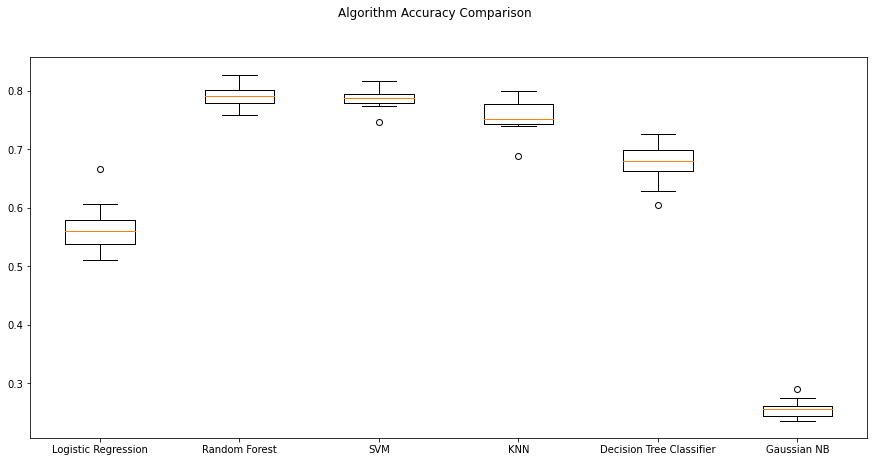

In [33]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

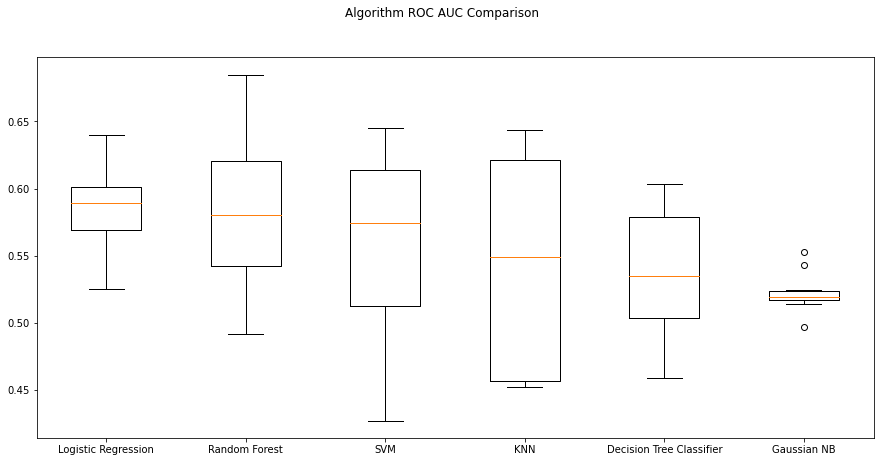

In [34]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

### Logistic Regression

In [35]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


AUC score (STD): 0.59 (0.03)


#### Fine-tuning

> GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

In [36]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=1.8309999999999995, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 1.8309999999999995}
best score: 0.5839077117875697


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


> As shown above, the results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.

#### Evaluation

Text(0.5, 257.44, 'Predicted label')

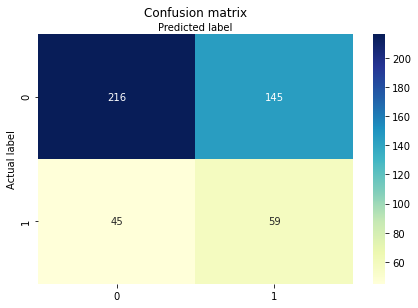

In [38]:
import seaborn as sns
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 59.14


In [40]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.60      0.69       361
           1       0.29      0.57      0.38       104

    accuracy                           0.59       465
   macro avg       0.56      0.58      0.54       465
weighted avg       0.71      0.59      0.62       465



> Instead of getting binary estimated target features (0 or 1), a probability can be associated with the predicted target. <br> The output provides a first index referring to the probability that the data belong to **class 0** (employee not leaving), and the second refers to the probability that the data belong to **class 1** (employee leaving).

> The resulting AUC score is: **77.63** which is higher than that best score during the optimisation step.

In [41]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logit_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.616


### ROC Graphs

> AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. <br>
The green line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). <br>

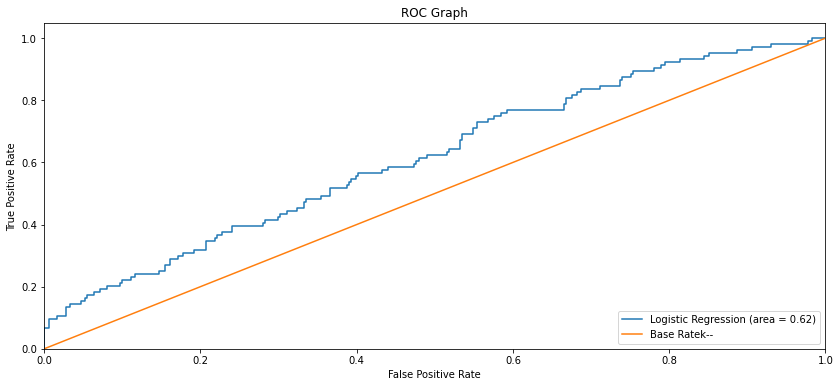

In [42]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [44]:
import pickle
pickle.dump(log_gs, open('model.pkl', 'wb'))

In [45]:
import joblib
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [46]:
filename = 'Attrition.csv'
joblib.dump(log_gs, filename)

['Attrition.csv']

In [47]:
# Load model
loaded_model = joblib.load(filename)
loaded_model

GridSearchCV(cv=10,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=7, solver='liblinear'),
             iid=True,
             param_grid={'C': array([1.000e-03, 1.100e-02, 2.100e-02, 3.100e-02, 4.100e-02, 5.100e-02,
       6.100e-02, 7.100e-02, 8.100e-02, 9.100e-02, 1.010e-01, 1.110e-01,
       1.210e-01, 1.310e-01, 1.410e-01, 1.510e-01, 1.610e-01, 1.710e-01,
       1.810e-01, 1.910e-01, 2.010e-01, 2...
       1.681e+00, 1.691e+00, 1.701e+00, 1.711e+00, 1.721e+00, 1.731e+00,
       1.741e+00, 1.751e+00, 1.761e+00, 1.771e+00, 1.781e+00, 1.791e+00,
       1.801e+00, 1.811e+00, 1.821e+00, 1.831e+00, 1.841e+00, 1.851e+00,
       1.861e+00, 1.871e+00, 1.881e+00, 1.891e+00, 1.901e+00, 1.911e+00,
       1.921e+00, 1.931e+00, 1.941e+00, 1.951e+00, 1.961e+00, 1.971e+00,
       1.981e+00, 1.991e+00])},
             return_train_score=True, scoring='roc_auc')

In [48]:
# Load new data into dataframe
test_feat = pd.read_csv('data_test.csv',encoding = "ISO-8859-1")
test_feat_ex=test_feat.copy()
test_feat = pd.DataFrame(test_feat)
test_feat
test_feat.shape

(2322, 9)

In [49]:
# Drop features not relevant to salary prediction
test_feat.drop(['Employeeid'], axis = 1, inplace = True)
test_feat.head()

,Age,Experience,EducationField,City,Department,Job_Title,Gender,NumCompaniesWorked
0,42,19,M.Tech/M.E.,Ahmedabad,Legal,Manager,Male,5
1,43,9,MBA/PGDM,Chennai,Engineering,Vice President,Male,8
2,38,18,Ph.D/Doctorate,Ahmedabad,Services,Project Manager,Male,6
3,43,12,MBA/PGDM,Ahmedabad,Business Development,Assistant Vice-President,Male,7
4,42,14,Ph.D/Doctorate,Chennai,Human Resources,Senior Manager,Male,3


In [50]:
# One-hot encode categorical data
test_feat = pd.get_dummies(test_feat)

# View top 5 rows of data
test_feat.head(5)

,Age,Experience,NumCompaniesWorked,EducationField_B.Tech/B.E.,EducationField_M.Tech/M.E.,EducationField_MBA/PGDM,EducationField_Other degrees,EducationField_Ph.D/Doctorate,City_Ahmedabad,City_Bangalore,...,Job_Title_TRAINEE,Job_Title_Team Lead,Job_Title_Technical Architect-,Job_Title_Technical Lead,Job_Title_Technical Lead -,Job_Title_Technical Lead Exempt,Job_Title_Technical Manager,Job_Title_Vice President,Gender_Female,Gender_Male
0,42,19,5,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,43,9,8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,38,18,6,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,43,12,7,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,42,14,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
# Predict Attrition from new data
loaded_model.predict(test_feat)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [52]:
#get predicted_salary as a CSV file
pd.DataFrame(loaded_model.predict(test_feat)).to_csv("predicted_Attrition.csv",header=False,index=True)